In [1]:
from os.path import abspath
import matplotlib.pyplot as plt
%matplotlib inline
from digitclutter import generate, io

## Generating samples
Generate a number of clutter samples using default parameters and save them in in a list

In [3]:
n_samples = 10

clutter_list = []

for i in range(n_samples):
    clutter_list += [generate.sample_clutter()]

## Saving and reading image sets
Save the parameters as a csv

In [4]:
clutter_list = io.name_files('test', clutter_list=clutter_list)

io.save_image_set(clutter_list, 'test/test.csv')

Read the image set

In [5]:
loaded_clutter_list = io.read_image_set('test/test.csv')
print([cl.get_character_list() for cl in clutter_list][:10])
print([cl.get_character_list() for cl in loaded_clutter_list][:10])

[['4'], ['7'], ['9'], ['3'], ['5'], ['6'], ['3'], ['8'], ['9'], ['3']]
[['4'], ['7'], ['9'], ['3'], ['5'], ['6'], ['3'], ['8'], ['9'], ['3']]


## Rendering images
Render the images

In [6]:
for cl in clutter_list:
    cl.render_occlusion()

## Saving as mat files
Save 32x32 versions of the images in a mat file with the labels

In [7]:
fname_list = [cl.fname for cl in clutter_list]
images_dict = io.save_images_as_mat(abspath('test/test.mat'), clutter_list, (32,32), fname_list=fname_list)

Using /imaging/cs04/2017_DigitclutterCode/temp_workspace as the working directory
Resizing the images
Generating image arrays
Generating target arrays
Images and target arrays saved to /imaging/cs04/2017_DigitclutterCode/test/test.mat


Plot as resized image

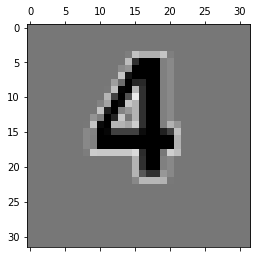

In [8]:
plt.matshow(images_dict['images'][0,:,:,0], cmap = plt.cm.gray, vmin=0, vmax=255)

## Adding debris
Add debris to the images using default debris parameters

In [9]:
debris_array = generate.make_debris(n_samples)
images_with_debris = generate.add_debris(images_dict['images'], debris_array)

Using /imaging/cs04/2017_DigitclutterCode/temp_workspace as the working directory


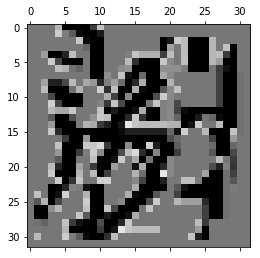

In [10]:
plt.matshow(images_with_debris[0,:,:,0], cmap=plt.cm.gray, vmin=0, vmax=255)